In [16]:
import pandas as pd
from sqlalchemy import create_engine

In [20]:
# Create a SQLite database connection
engine = create_engine("sqlite:////Users/muhammadammarfauzan/Library/DBeaverData/workspace6/.metadata/sample-database-sqlite-1/Chinook.db")

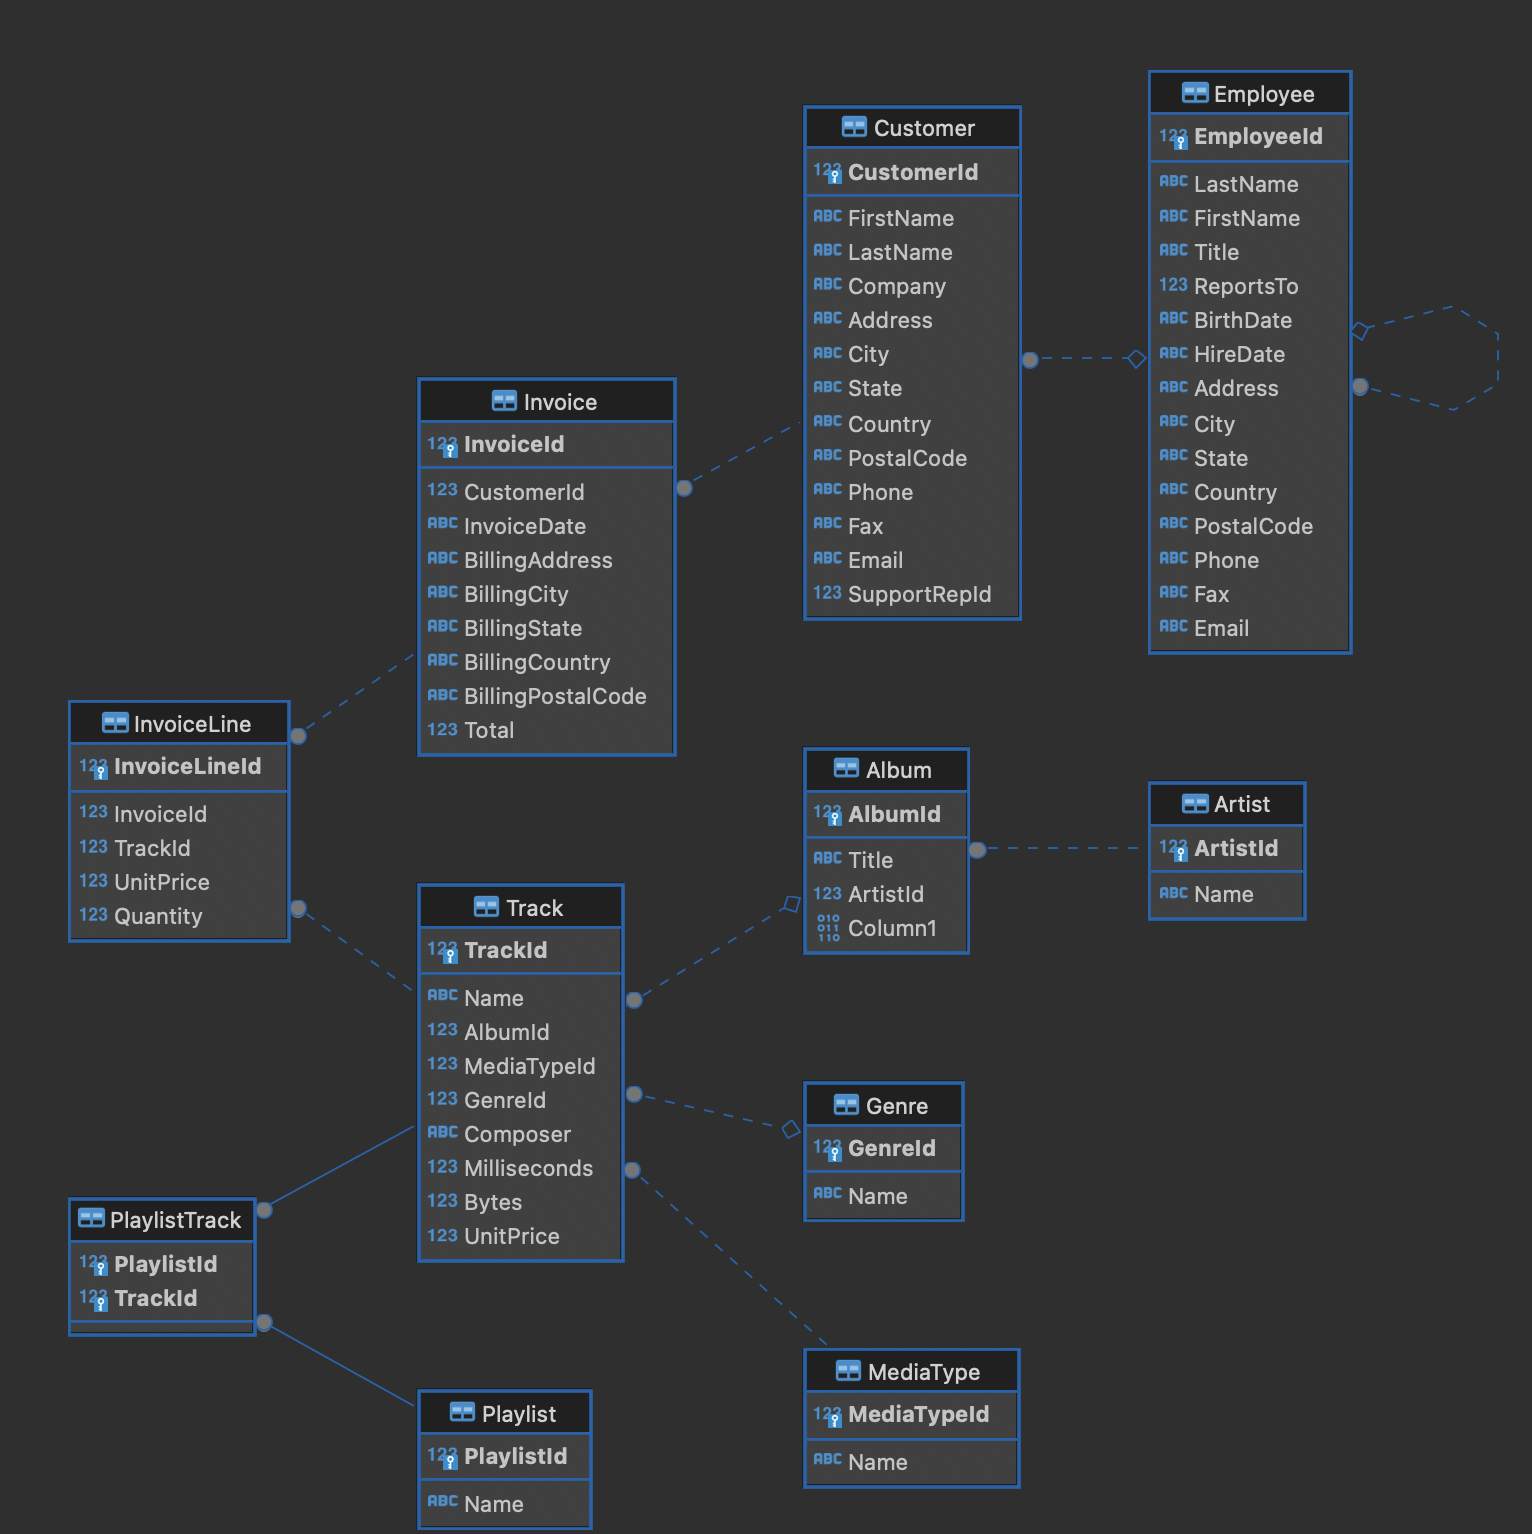

In [28]:
# help(engine)

In [21]:
engine.table_names() #show list of table

/var/folders/d1/bx_wyvyj09l98tsxxc3r53w80000gp/T/ipykernel_73199/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track',
 'foo']

In [29]:
# Execute a SQL query and load the result into a DataFrame
query = "SELECT * FROM Invoice limit 10"

df = pd.read_sql(query, engine)

# try:
#     df = pd.read_sql(query, engine)
# except Exception as e:
#     print(f"Error executing SQL query: {str(e)}")

In [30]:
# Display the results in Jupyter Lab
df.head()  # Display the first few rows of the DataFrame

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2007-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2007-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2007-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2007-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2007-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [31]:
query = """
    SELECT 
        DATE(InvoiceDate, 'START OF MONTH') as month, 
        count(distinct InvoiceId) as total_invoice,
        count(distinct CustomerId) as total_customer, 
        sum(Total) as total_amount_invoice
    FROM Invoice i 
    GROUP BY 1
    ORDER BY 1 DESC
"""

df_trend_invoice_monthly = pd.read_sql(query, engine)
df_trend_invoice_monthly.head()

,month,total_invoice,total_customer,total_amount_invoice
0,2011-12-01,7,7,38.62
1,2011-11-01,7,7,49.62
2,2011-10-01,7,7,37.62
3,2011-09-01,7,7,37.62
4,2011-08-01,7,7,37.62
